In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
plt.rcdefaults()

In [19]:
train_o = pd.read_csv("data/train.csv")
test_o = pd.read_csv("data/test.csv")
train = train_o.copy()
test = test_o.copy()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5244 non-null   int64  
 1   title       5244 non-null   object 
 2   Rating      5041 non-null   float64
 3   maincateg   5177 non-null   object 
 4   platform    5244 non-null   object 
 5   actprice1   5244 non-null   int64  
 6   norating1   5244 non-null   int64  
 7   noreviews1  5244 non-null   int64  
 8   star_5f     5176 non-null   float64
 9   star_4f     5244 non-null   int64  
 10  star_3f     5244 non-null   int64  
 11  star_2f     5244 non-null   int64  
 12  star_1f     5058 non-null   float64
 13  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 573.7+ KB


In [5]:
train.isnull().sum(), test.isnull().sum()

(id              0
 title           0
 Rating          0
 maincateg     526
 platform        0
 price1          0
 actprice1       0
 Offer %         0
 norating1     678
 noreviews1    578
 star_5f       588
 star_4f       539
 star_3f       231
 star_2f         0
 star_1f         0
 fulfilled1      0
 dtype: int64,
 id              0
 title           0
 Rating        203
 maincateg      67
 platform        0
 actprice1       0
 norating1       0
 noreviews1      0
 star_5f        68
 star_4f         0
 star_3f         0
 star_2f         0
 star_1f       186
 fulfilled1      0
 dtype: int64)

In [ ]:
train[train.columns[7]] = train[train.columns[7]].apply(lambda x: x.split("%")[0]).astype(float)

## Title Column

In [12]:
for i in range(10):
    rand_num = random.randint(0, len(train))
    print(train["title"][rand_num])

ABRIO Running Shoes For Men  (Blue)
Jutis For Women  (Yellow)
Combo of 3 Relax Reflexology Sandals Accupressure Slippers Non-Slip Healthy Flip Flop for Men Flip Flops
Rocking Long Boots For Men  (Brown)
Classical Formal Full Black/Brown Strong Pure Leather Shoes For Mens/Boys Mojaris For Men  (Brown)
Women Black Wedges Sandal
Running Shoes For Men  (Yellow)
349 Casuals For Men  (Black)
Men's Casual Shoes Combo Pack of 02 Sneakers For Men  (Tan, Black)
Shoefly Women Combo Pack of 3 Multicolour Latest Collection Loafers Sneakers Shoes (Combo-(3)-1044-993-767)


We can't use the `title` column by itself. Instead, we'll be extracting some information from the `title` column that will be used in our model.

In [21]:
train["combo"] = train["title"].apply(lambda x: "combo" in x.lower())
test["combo"] = test["title"].apply(lambda x: "combo" in x.lower())

<AxesSubplot:xlabel='combo', ylabel='Offer %'>

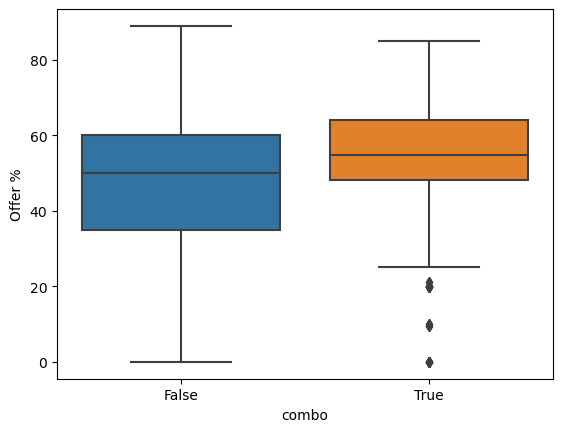

In [41]:
sns.boxplot(x="combo", y=r"Offer %", data=train)

In [83]:
def get_cat(title):
    keywords=[
    "sandal",
    "sneaker",
    "boot",
    "shoe",
    "juti",
    "casual",
    "mojaris",
    "bellie",
    "flip",
    "slipper",
    ]
    for key in keywords:
        if key in title.lower():
            return key
    return "other"

In [92]:
train["category"] = train["title"].apply(get_cat)
test ["category"] = test ["title"].apply(get_cat)

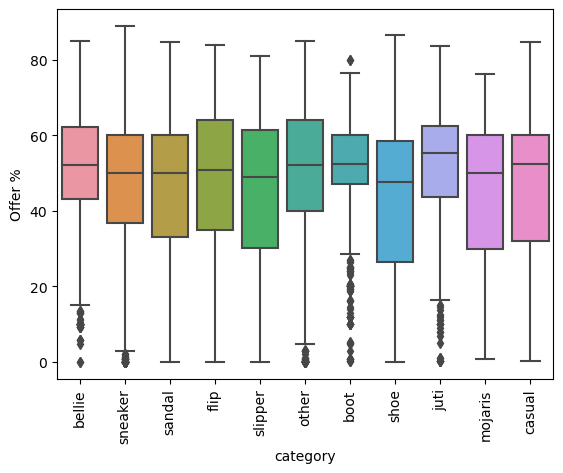

In [87]:
sns.boxplot(x="category", y=r"Offer %", data=train)
plt.xticks(rotation=90);

## Rating

In [95]:
train["Rating"]

0        3.9
1        3.8
2        4.4
3        4.2
4        3.9
        ... 
15725    4.3
15726    3.9
15727    3.7
15728    3.9
15729    5.0
Name: Rating, Length: 15730, dtype: float64

Test set has some null values for the `Rating` column. We'll fill them after we have filled the null values for the star rating columns.

## maincateg

In [97]:
train["maincateg"].value_counts()

Women    8781
Men      6423
Name: maincateg, dtype: int64

In [123]:
def fill_maincateg(row):
    masc = ["man", "boy", "men", "lad"]
    fam = ["girl", "women", "woman", "lady", "ladies", "slipper"]
    title = row["title"]
    maincateg = row["maincateg"]
    if maincateg is np.nan:
        for m in masc:
            if m in title.lower():
                return "Men"
        for f in fam:
            if f in title.lower():
                return "Women"
        return random.sample(["Men", "Women"], 1)[0]
    return maincateg

In [124]:
train["maincateg"] = train.apply(fill_maincateg, axis=1)
test["maincateg"] = test.apply(fill_maincateg, axis=1)

## norating1, noreview1

In [127]:
train[train["norating1"].isna()]

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,combo,category
19,12336,Women Beige Heels Sandal,4.0,Men,Flipkart,499,999,50.05,NaN,NaN,28.0,9.0,10.0,2,5,0,False,sandal
63,6597,Slides,3.9,Men,Flipkart,300,1500,80.00,NaN,NaN,NaN,NaN,10.0,5,9,1,False,other
68,5575,Women Copper Flats Sandal,4.1,Men,Flipkart,349,999,65.07,NaN,27.0,NaN,NaN,22.0,5,15,1,False,sandal
91,4262,Slippers,3.6,Women,Flipkart,213,249,14.46,NaN,NaN,NaN,NaN,466.0,281,476,1,False,slipper
116,2767,Ace Slip-On Running Shoes For Men (Black),4.3,Men,Flipkart,2999,4999,40.01,NaN,NaN,46.0,27.0,5.0,1,5,1,False,shoe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15583,11224,Jutis For Men (Black),3.7,Men,Flipkart,494,499,1.00,NaN,NaN,22.0,NaN,4.0,4,8,0,False,juti
15606,19633,Men Blue Clogs Sandal,3.8,Men,Flipkart,292,1249,76.62,NaN,NaN,NaN,123.0,81.0,29,66,1,False,sandal
15674,7209,Zod Runner V3 Wn s IDP Running Shoes For Women...,4.3,Men,Flipkart,1699,3999,57.51,NaN,NaN,NaN,NaN,268.0,102,140,1,False,shoe
15709,14826,Enzo Beta Wn's Basketball Shoes For Women (Br...,3.9,Men,Flipkart,1701,5499,69.07,NaN,NaN,NaN,NaN,6.0,2,10,1,False,shoe


We'll assume that the null values of `norating1` are 0.

In [129]:
train["norating1"].fillna(0, inplace=True)
test["norating1"].fillna(0, inplace=True)
train["noreviews1"].fillna(0, inplace=True)
test["noreviews1"].fillna(0, inplace=True)

## Star Ratings

In [132]:
train[train["star_5f"].notna()].head().T

,0,1,2,3,4
id,16695,5120,18391,495,16408
title,Fashionable & Comfortable Bellies For Women (...,Combo Pack of 4 Casual Shoes Sneakers For Men ...,Cilia Mode Leo Sneakers For Women (White),Men Black Sports Sandal,Men Green Sports Sandal
Rating,3.9,3.8,4.4,4.2,3.9
maincateg,Women,Men,Women,Men,Men
platform,Flipkart,Flipkart,Flipkart,Flipkart,Flipkart
price1,698,999,2749,518,1379
actprice1,999,1999,4999,724,2299
Offer %,30.13,50.03,45.01,15.85,40.02
norating1,38,531,17,46413,77
noreviews1,7,69,4,6229,3


In [131]:
train[train["star_5f"].isna()].head().T

,63,68,91,131,164
id,6597,5575,4262,16618,15117
title,Slides,Women Copper Flats Sandal,Slippers,FUZOR B Running Shoes For Men (Black),Women Off White Wedges Sandal
Rating,3.9,4.1,3.6,4.2,3.8
maincateg,Men,Men,Women,Men,Women
platform,Flipkart,Flipkart,Flipkart,Flipkart,Flipkart
price1,300,349,213,2165,437
actprice1,1500,999,249,3799,999
Offer %,80,65.07,14.46,43.01,56.26
norating1,0,0,0,0,0
noreviews1,0,27,0,0,2


Here is the strategy we'll use to fill in the null values of the star rating columns:
1. Fill the `star_1f` with 0.
2. Fill the `star_2f` as 1/3 of the `star_1f` or 0.
3. Fill the `star_3f` the sum of the `star_1f` and `star_2f` or 0.
4. Fill the `star_4f` as the sum of the `star_1f`, `star_2f`, and `star_3f` or 0.
5. Fill the `star_5f` as the sum of the `star_1f`, `star_2f`, `star_3f`, and `star_4f` or 0.

In [134]:
train["star_1f"].fillna(0, inplace=True)
test["star_1f"].fillna(0, inplace=True)

In [135]:
def fill_star2(row):
    if row["star_2f"] is np.nan:
        return int(1/3 * row["star_1f"])
    return row["star_2f"]

In [140]:
train["star_2f"] = train.apply(fill_star2, axis=1)
test["star_2f"] = test.apply(fill_star2, axis=1)

In [154]:
none_value = train[train["star_3f"].isna()]["star_3f"][38]

In [160]:
str(none_value)

'nan'

In [161]:
str(train[train["star_3f"].isna()]["star_3f"][328]) == str(none_value)

True

In [162]:
def fill_star3(row):
    if str(row["star_3f"]) == str(none_value):
        return row["star_2f"]+row["star_1f"]
    return row["star_3f"]
def fill_star4(row):
    if str(row["star_4f"]) == str(none_value):
        return row["star_3f"]+row["star_2f"]+row["star_1f"]
    return row["star_4f"]
def fill_star5(row):
    if str(row["star_5f"]) == str(none_value):
        return row["star_4f"]+row["star_3f"]+row["star_2f"]+row["star_1f"]
    return row["star_5f"]

In [164]:
train["star_3f"] = train.apply(fill_star3, axis=1)
test["star_3f"] = test.apply(fill_star3, axis=1)

train["star_4f"] = train.apply(fill_star4, axis=1)
test["star_4f"] = test.apply(fill_star4, axis=1)

train["star_5f"] = train.apply(fill_star5, axis=1)
test["star_5f"] = test.apply(fill_star5, axis=1)

In [173]:
train.isna().sum(), test.isna().sum()

(id            0
 title         0
 Rating        0
 maincateg     0
 platform      0
 price1        0
 actprice1     0
 Offer %       0
 norating1     0
 noreviews1    0
 star_5f       0
 star_4f       0
 star_3f       0
 star_2f       0
 star_1f       0
 fulfilled1    0
 combo         0
 category      0
 dtype: int64,
 id              0
 title           0
 Rating        203
 maincateg       0
 platform        0
 actprice1       0
 norating1       0
 noreviews1      0
 star_5f         0
 star_4f         0
 star_3f         0
 star_2f         0
 star_1f         0
 fulfilled1      0
 combo           0
 category        0
 dtype: int64)

Now let's fill the null values of `Rating` column as promised by using the star ratings.

In [181]:
def get_rating(row):
    if str(row["Rating"]) == "nan":    
        one_star = row["star_1f"]
        two_star = row["star_2f"]
        three_star = row["star_3f"]
        four_star = row["star_4f"]
        five_star = row["star_5f"]
        all_rating = one_star+two_star+three_star+four_star+five_star
        if all_rating == 0:
            return 0
        rating = (one_star+2*two_star+3*three_star+4*four_star+5*five_star)/all_rating
        assert rating >= 0 and rating <= 5
        return round(rating, 1)
    return row["Rating"]
    

In [185]:
test["Rating"] = test.apply(get_rating, axis=1)

# Finalizing the Data

In [188]:
train.columns, test.columns

(Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
        'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
        'star_2f', 'star_1f', 'fulfilled1', 'combo', 'category'],
       dtype='object'),
 Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'actprice1',
        'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f',
        'star_1f', 'fulfilled1', 'combo', 'category'],
       dtype='object'))

In [189]:
train.drop(["title", r"Offer %"], axis=1, inplace=True)
test.drop(["title"], axis=1, inplace=True)

In [192]:
train.to_csv("train_prepared.csv", index=False)
test.to_csv("test_prepared.csv", index=False)